In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [ ]:
gambar = np.array(Image.open("gambar.jpg"))
gambar.shape

(1704, 1280, 3)

# **Ekstrak Tiap Channel Dari RGB**

In [ ]:
red_channel = gambar[:, :, 0]
green_channel = gambar[:, :, 1]
blue_channel = gambar[:, :, 2]

red_image = np.zeros_like(gambar)
red_image[:, :, 0] = red_channel

green_image = np.zeros_like(gambar)
green_image[:, :, 1] = green_channel

blue_image = np.zeros_like(gambar)
blue_image[:, :, 2] = blue_channel

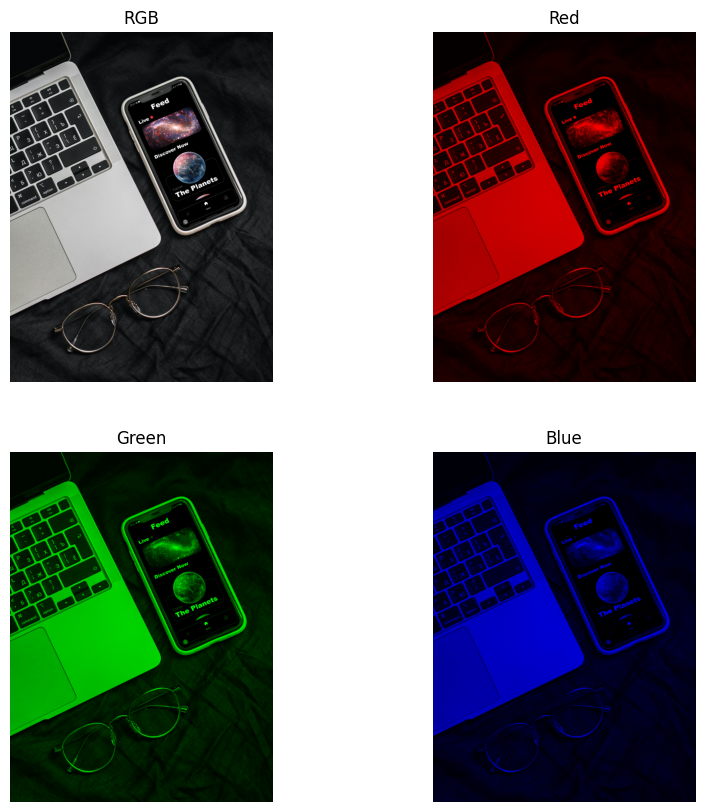

In [ ]:
fig, ax = plt.subplots(2, 2 , figsize=(10, 10))

titles = [["RGB", "Red"],["Green", "Blue"]]
images = [[gambar, red_image], [ green_image,  blue_image]]

for i in range(2):
    for j in range(2):
      ax[i, j].set_title(titles[i][j])
      ax[i, j].imshow(images[i][j])
      ax[i, j].axis('off')

plt.show()

# **Greyscale**

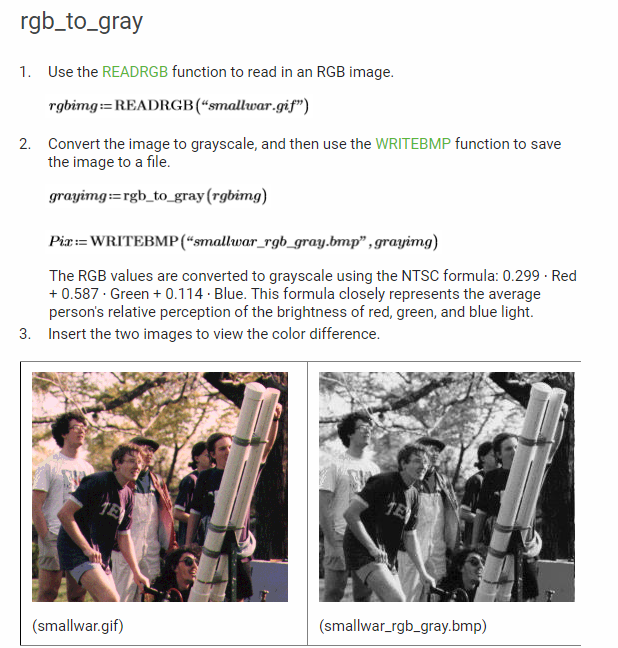

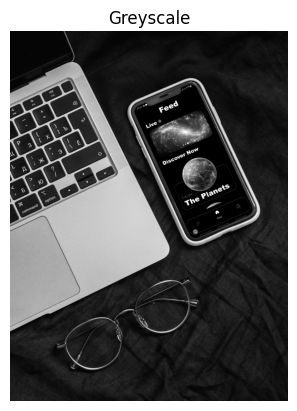

In [ ]:
grayscale_img = 0.2989 * red_channel + 0.5870 * green_channel + 0.1140 * blue_channel

plt.imshow(grayscale_img, cmap='gray')
plt.title("Greyscale")
plt.axis('off')
plt.show()

# **Kernel**

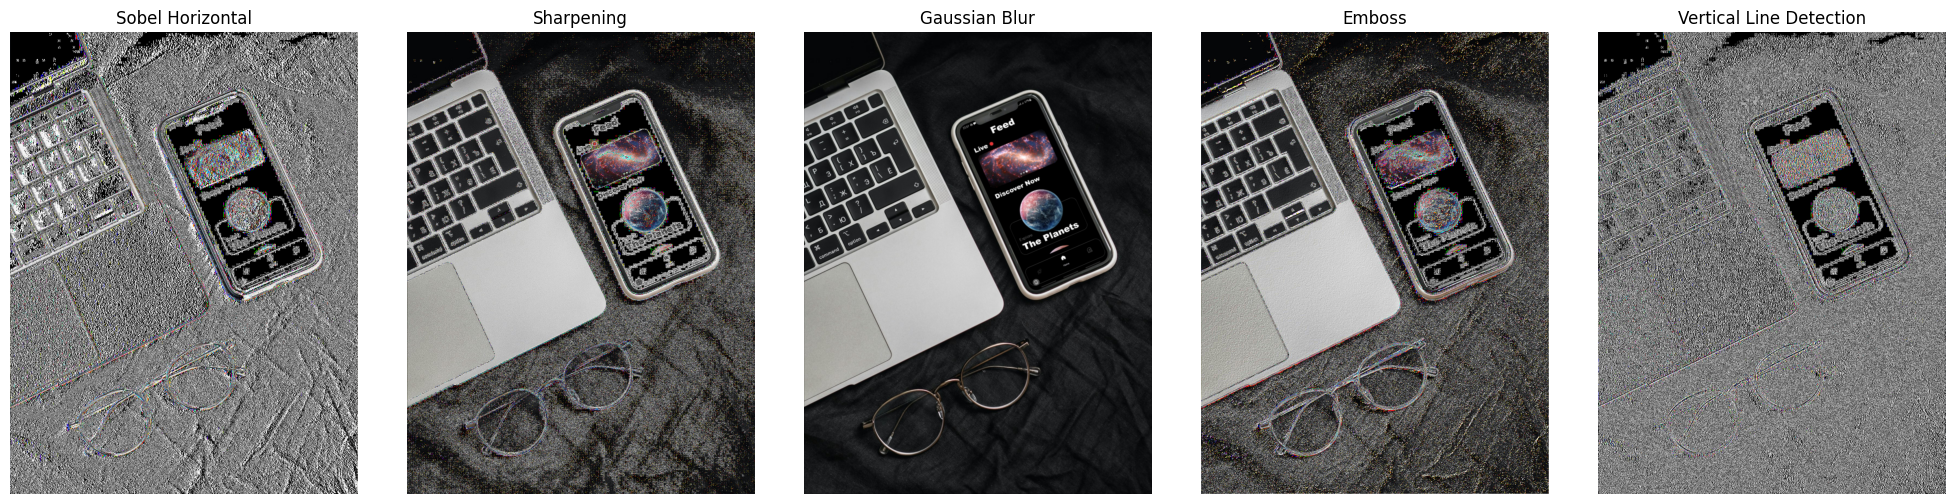

In [ ]:
kernels = {
    "Sobel Horizontal": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sharpening": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Gaussian Blur": np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16,
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Vertical Line Detection": np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]]),
}

def convolve2d(image, kernel):
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    pad_h = kernel_h // 2
    pad_w = kernel_w // 2

    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    output = np.zeros_like(image)

    for i in range(image_h):
        for j in range(image_w):
            region = padded_image[i:i+kernel_h, j:j+kernel_w]
            output[i, j] = np.sum(region * kernel)

    return output

def apply_convolution(image, kernel):

    red_conv = convolve2d(red_channel, kernel)
    green_conv = convolve2d(green_channel, kernel)
    blue_conv = convolve2d(blue_channel, kernel)

    conv_image = np.stack([red_conv, green_conv, blue_conv], axis=2)

    conv_image = np.clip(conv_image, 0, 255)

    return conv_image.astype(np.uint8)


fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, (kernel_name, kernel) in enumerate(kernels.items()):
    conv_image = apply_convolution(gambar, kernel)

    ax = axs[i]
    ax.imshow(conv_image)
    ax.set_title(kernel_name)
    ax.axis('off')

plt.tight_layout()
plt.show()


# **Pooling**

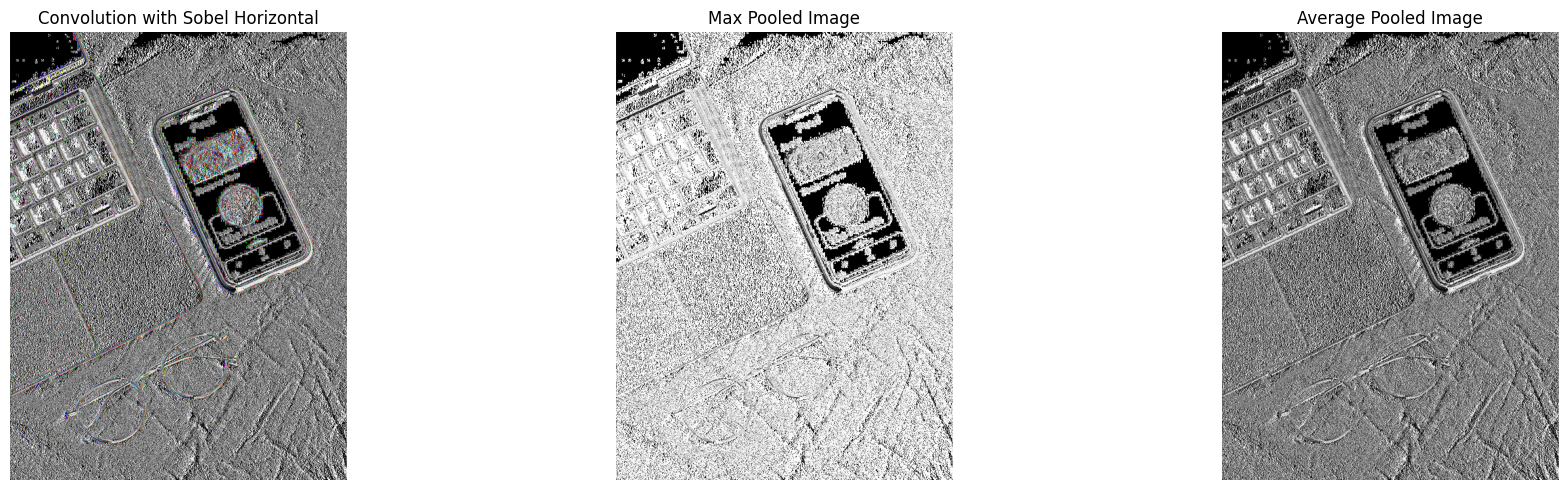

In [ ]:
def max_pooling(image, pool_size=2):
    image_h, image_w = image.shape
    pooled_h = image_h // pool_size
    pooled_w = image_w // pool_size

    pooled_image = np.zeros((pooled_h, pooled_w), dtype=image.dtype)

    for i in range(pooled_h):
        for j in range(pooled_w):
            region = image[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
            pooled_image[i, j] = np.max(region)

    return pooled_image

def avg_pooling(image, pool_size=2):
    image_h, image_w = image.shape
    pooled_h = image_h // pool_size
    pooled_w = image_w // pool_size

    pooled_image = np.zeros((pooled_h, pooled_w), dtype=image.dtype)

    for i in range(pooled_h):
        for j in range(pooled_w):
            region = image[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
            pooled_image[i, j] = np.mean(region)

    return pooled_image

kernel = kernels["Sobel Horizontal"]
conv_image = apply_convolution(gambar, kernel)

max_pooled_image = max_pooling(conv_image[:, :, 0], pool_size=2)
avg_pooled_image = avg_pooling(conv_image[:, :, 0], pool_size=2)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].imshow(conv_image)
axs[0].set_title("Convolution with Sobel Horizontal")
axs[0].axis('off')

axs[1].imshow(max_pooled_image, cmap='gray')
axs[1].set_title("Max Pooled Image")
axs[1].axis('off')

axs[2].imshow(avg_pooled_image, cmap='gray')
axs[2].set_title("Average Pooled Image")
axs[2].axis('off')

plt.tight_layout()
plt.show()


# **Flattening**

In [ ]:
def flatten(image):
    height, width = image.shape
    flat_length = height * width
    flat_image = np.zeros(flat_length, dtype=image.dtype)

    index = 0
    for i in range(height):
        for j in range(width):
            flat_image[index] = image[i, j]
            index += 1

    return flat_image

flattened_image = flatten(max_pooled_image)
flattened_image

array([ 20,   0,   0, ..., 255,  16, 214], dtype=uint8)